# Análise dos dados dos senadores brasileiros

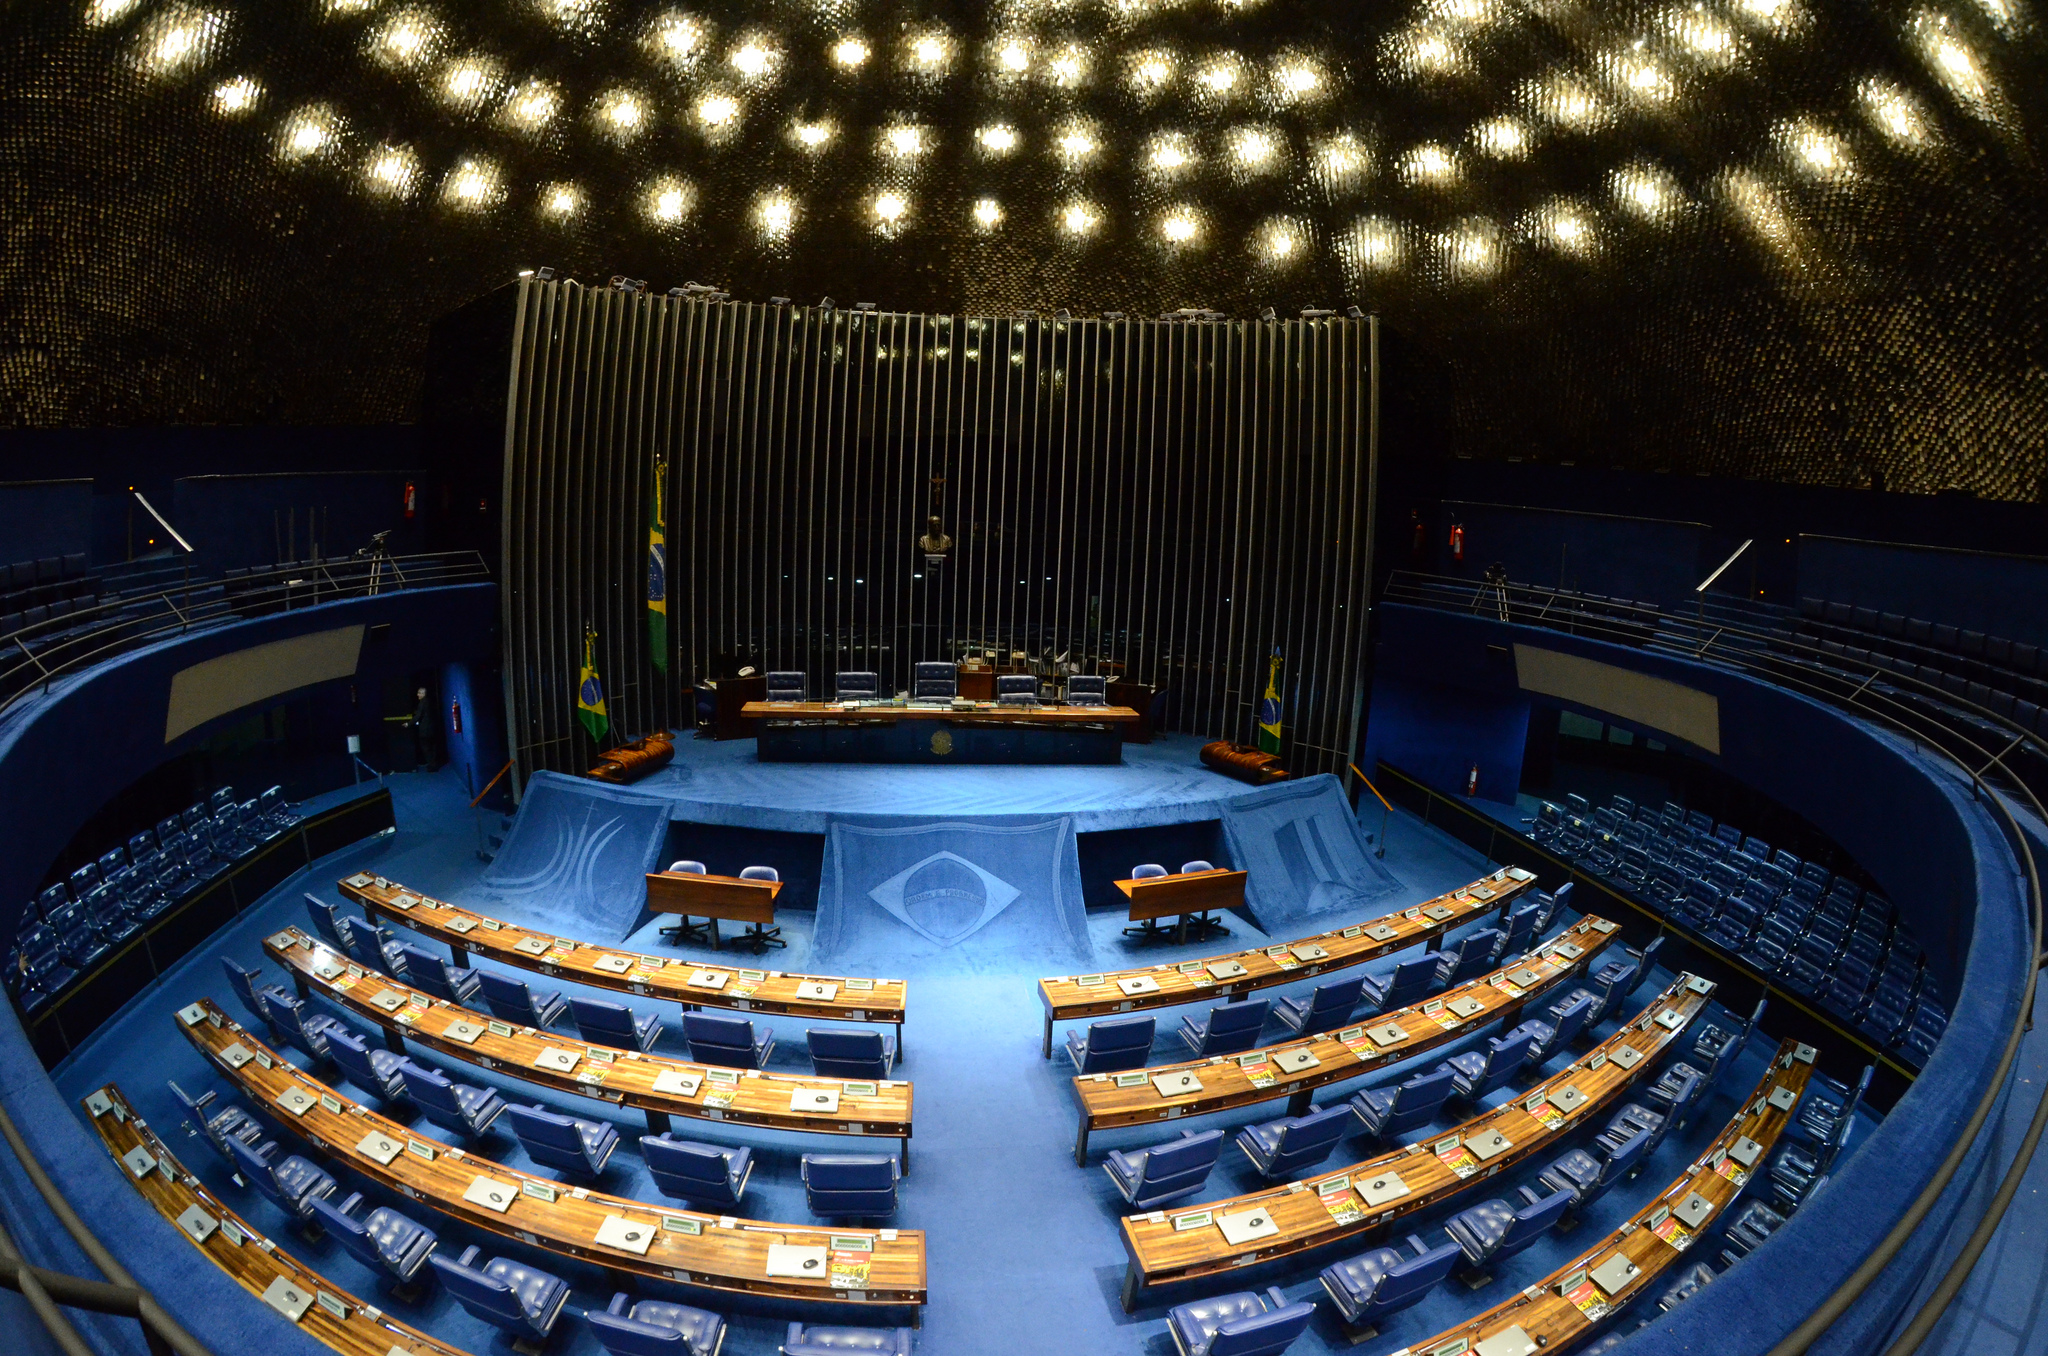

In [97]:
from IPython.display import Image
Image(filename='reports/senado.jpg',width='80%', height='80%')

## 1 step: Prepare environment
- Imports
- Current Directory
- Files
- Save configuration environment
- Save requirements
- Cell Format

### Imports

In [91]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # analise de variáveis vazia

# Other
import time
import os
import subprocess

### Prepare Principal Directory

In [92]:
# Actual PATH

path = os.getcwd()
print('Current working directory:\n{}\n'.format(path))


# Create variable to path datas
path_data = 'data/'

# Create variable to path_project
path_project = '/home/campos/projetos/data_science/projects/analise_despesas_senadores/'

os.chdir(path_project)
print('Current working directory changed !')

Current working directory:
/home/campos/projetos/data_science/projects/analise_despesas_senadores

Current working directory changed !


### Files

In [108]:
command = os.popen('tree')
print(command.read())

.
├── config_environment.txt
├── data
│   ├── 2016.csv
│   ├── 2018.csv
│   ├── dados_limpos_ceaps_processed.csv
│   ├── gastos2008.csv
│   ├── gastos2009.csv
│   ├── gastos2010.csv
│   ├── gastos2011.csv
│   ├── gastos2012.csv
│   ├── gastos2013.csv
│   ├── gastos2014.csv
│   ├── gastos2015.csv
│   ├── gastos2016.csv
│   ├── gastos2017.csv
│   ├── gastos2018.csv
│   └── gastos2019.csv
├── notebooks
│   ├── CEAPS-2016-part01.ipynb
│   ├── CEAPS-2016-part02.ipynb
│   └── requirements.txt
├── readme.md
├── reports
│   └── senado.jpg
├── requirements.txt
└── src
    ├── create_requeriments.sh
    ├── download_csv.py
    ├── __init__.py
    ├── prepare_environment.sh
    └── __pycache__
        ├── download_csv.cpython-36.pyc
        └── __init__.cpython-36.pyc

5 directories, 28 files



### Save configuration environment

In [115]:
command = os.popen('bash src/prepare_environment.sh')
print(command.read())

Configuration environment:

SO:
Linux
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.2 LTS
Release:	18.04
Codename:	bionic

Pip Version:
pip 19.0.2 from /home/campos/anaconda3/lib/python3.6/site-packages/pip (python 3.6)

Conda Version:
conda 4.3.30

Jupyter Version:
4.3.0



### Save requirements

In [116]:
command = os.popen('bash src/create_requeriments.sh')
print(command.read())


Requirements this project:

requests==2.18.4
beautifulsoup4==4.7.1



### Cell Format

In [40]:
# Guarantees visualization inside the jupyter
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Definition color and map de colors
default_color = '#56B4E9'
colormap = plt.cm.cool

## 2 step: Questions
- Qual o senador que mais gastou ?
- Qual o senador que mais pediu reembolso?
- Reembolsos menores que  R$ 1,00
- Gráfico comparando a quantidade gasta por cada senador

## 3 step: Data Acquisition
- **Fonte:**
portal da transparência: https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps
- **Ano**: 2016
- **Format**: CSV

In [46]:
from src.download_csv import *

url = 'https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps'

list_csv = get_links_csv(url)
dump_file_csv(list_csv, path_data)

Try analysing page ...
http://www.senado.gov.br/transparencia/LAI/verba/2019.csv
http://www.senado.gov.br/transparencia/LAI/verba/2018.csv
http://www.senado.gov.br/transparencia/LAI/verba/2017.csv
http://www.senado.gov.br/transparencia/LAI/verba/2016.csv
http://www.senado.gov.br/transparencia/LAI/verba/2015.csv
http://www.senado.gov.br/transparencia/LAI/verba/2014.csv
http://www.senado.gov.br/transparencia/LAI/verba/2013.csv
http://www.senado.gov.br/transparencia/LAI/verba/2012.csv
http://www.senado.gov.br/transparencia/LAI/verba/2011.csv
http://www.senado.gov.br/transparencia/LAI/verba/2010.csv
http://www.senado.gov.br/transparencia/LAI/verba/2009.csv
http://www.senado.gov.br/transparencia/LAI/verba/2008.csv

2019.csv downloaded!

2018.csv downloaded!

2017.csv downloaded!

2016.csv downloaded!

2015.csv downloaded!

2014.csv downloaded!

2013.csv downloaded!

2012.csv downloaded!

2011.csv downloaded!

2010.csv downloaded!

2009.csv downloaded!

2008.csv downloaded!


### Load dataset

In [54]:
%%time

df = pd.read_csv('data/gastos2016.csv', 
                  encoding='latin1',
                  delimiter=';', 
                  verbose=True)

Tokenization took: 26.82 ms
Type conversion took: 54.77 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 124 ms, sys: 8 ms, total: 132 ms
Wall time: 130 ms


## 4 step: Data Analysis

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26689 entries, (ANO, MES, SENADOR, TIPO_DESPESA, CNPJ_CPF, FORNECEDOR, DOCUMENTO, DATA) to (2016, 12, ZEZÉ PERRELLA, Passagens aéreas, aquáticas e terrestres nacionais, 21.443.582/0001-50, Pronto Produção de Eventos e Turismo Ltda, ZDS6KY, 12/12/2016)
Data columns (total 2 columns):
ULTIMA ATUALIZACAO    21309 non-null object
09/03/2019 04:01      26689 non-null object
dtypes: object(2)
memory usage: 974.5+ KB


Há um problema na geração dos dados. Neste caso, com `head()` é possível identificar como esta formatado.

In [56]:
df.head()

ULTIMA ATUALIZACAO  \
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                       DOCUMENTO DATA                                             DETALHAMENTO   
2016 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 05.914.650/0001-66 ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA 000011328 13/01/2016  Despesa com pagamento de energia elétrica para...   
                                                                                                                             000011327 18/01/2016  Pagamento de energia elétrica para o escritóri...   
                                                                         004.948.028-63     GILBERTO PISELO DO NASCIMENTO    001/16    04/01/2016  Despesa com pagamento de aluguel, utilizado pa...   
                                                                         05.423.963/0001-11 OI MÓVEL S.A.                    661639001 16/01/2016  despesa com pagamento de telefonia para o escr...   

                                                                                                                                                    09/03/2019 04:01  
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                       DOCUMENTO DATA        VALOR_REEMBOLSADO  
2016 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 05.914.650/0001-66 ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA 000011328 13/01/2016               73,6  
                                                                                                                             000011327 18/01/2016             206,84  
                                                                         004.948.028-63     GILBERTO PISELO DO NASCIMENTO    001/16    04/01/2016               6000  
                                                                         05.423.963/0001-11 OI MÓVEL S.A.                    661639001 16/01/2016             407,48

- É necessário **remover** a 1ª linha do dataset.

In [59]:
%%time

df = pd.read_csv('data/gastos2016.csv', 
                  encoding='latin1',
                  delimiter=';', 
                  header=1, # start df
                  verbose=True)

Tokenization took: 23.84 ms
Type conversion took: 56.03 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 70 ms, sys: 20 ms, total: 90 ms
Wall time: 88.7 ms


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688 entries, 0 to 26687
Data columns (total 10 columns):
ANO                  26688 non-null int64
MES                  26688 non-null int64
SENADOR              26688 non-null object
TIPO_DESPESA         26688 non-null object
CNPJ_CPF             26688 non-null object
FORNECEDOR           26688 non-null object
DOCUMENTO            24647 non-null object
DATA                 26688 non-null object
DETALHAMENTO         21308 non-null object
VALOR_REEMBOLSADO    26688 non-null object
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


In [61]:
df.describe()

,ANO,MES
count,26688.0,26688.000000
mean,2016.0,6.470848
std,0.0,3.257301
min,2016.0,1.000000
25%,2016.0,4.000000
50%,2016.0,6.000000
75%,2016.0,9.000000
max,2016.0,12.000000


In [62]:
df.describe(include = ['object'])

,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
count,26688,26688,26688,26688,24647,26688,21308,26688
unique,93,7,3861,4321,22521,483,12284,14129
top,WELLINGTON FAGUNDES,"Locomoção, hospedagem, alimentação, combustíve...",16.978.175/0001-08,LATAM,s/n,01/06/2016,Aquisição de combustível para veículos utiliza...,100
freq,925,10326,1736,698,121,200,567,658


In [63]:
print(df.dtypes)

ANO                   int64
MES                   int64
SENADOR              object
TIPO_DESPESA         object
CNPJ_CPF             object
FORNECEDOR           object
DOCUMENTO            object
DATA                 object
DETALHAMENTO         object
VALOR_REEMBOLSADO    object
dtype: object


In [64]:
df.shape

(26688, 10)

### Notas
- Os dados estão com formato de `;`
- Coluna `SENADOR` é o _target_
- Há 10 colunas
- 26691 linhas
- A data com maior número de pedido de reembolso foi 01/06/2016, por quê?
- Analisando as variáveis que temos para trabalhar é possível notar que será necessário converter algumas colunas de String para tipo numérico e assim conseguir aplicar alguma técnica de análise.
- É possível ter valores _missing_ pois nem todas as colunas tem o mesmo número de linhas.
- Analisar o SENADOR 90, pois é quem masi teve pedidos de reembolso nesse ano.

### Análise das _features_
- `ANO(int64)`
- `MES(int64)`
- `SENADOR:` há 93 senadores
- `TIPO_DESPESA`: 7 tipos de dispesas diferentes
- `CNPJ_CPF(object)`: de quem prestou o serviço
- `FORNECEDOR`: há 4319 fornecedores diferentes
- `DOCUMENTO(object)`
- `DATA`: data da dispesa
- `DETALHAMENTO(object)`
- `VALOR_REEMBOLSADO`: valor reembolsado

---

## 5 step: Data Cleanning
- Types convert
- Check outliers
- Check missing values
- Check unique values
- Check duplicate
- Check irrelevant data

### Types convert
- datas devem ser do tipo `date`
- senadores devem ser do tipo `int`
- valor de reemboloso deve ser do tipo `float`
- tipo de despesa deve ser do tipo `int`

In [65]:
# Mapping (name)String in (number)integer

dict_name = {'senador_name': 'number'}
value = 0
for name in df['SENADOR']:
    if (name in dict_name):
        dict_name[name] = value
    else:
        value += 1
        dict_name[name] = value

# print dict
for keys,values in dict_name.items():
    print(values, end=': ')
    print(keys) 

number: senador_name
1: ACIR GURGACZ
2: AÉCIO NEVES
3: ALOYSIO NUNES FERREIRA
4: ALVARO DIAS
5: ANA AMÉLIA
6: ÂNGELA PORTELA
7: ANTONIO ANASTASIA
8: ANTÔNIO CARLOS VALADARES
9: ARMANDO MONTEIRO
10: ATAÍDES OLIVEIRA
11: BENEDITO DE LIRA
12: BLAIRO MAGGI
13: CÁSSIO CUNHA LIMA
14: CIDINHO SANTOS
15: CIRO NOGUEIRA
16: CRISTOVAM BUARQUE
17: DALIRIO BEBER
18: DÁRIO BERGER
19: DAVI ALCOLUMBRE
20: DECA
21: DONIZETI NOGUEIRA
22: DOUGLAS CINTRA
23: EDISON LOBÃO
24: EDUARDO AMORIM
25: EDUARDO BRAGA
26: EDUARDO LOPES
27: ELMANO FÉRRER
28: FÁTIMA BEZERRA
29: FERNANDO BEZERRA COELHO
30: FERNANDO COLLOR
31: FLEXA RIBEIRO
32: GARIBALDI ALVES FILHO
33: GILBERTO PISELO
34: GLADSON CAMELI
35: GLEISI HOFFMANN
36: HÉLIO JOSÉ
37: HUMBERTO COSTA
38: IVO CASSOL
39: JADER BARBALHO
40: JOÃO ALBERTO SOUZA
41: JOÃO CAPIBERIBE
42: JORGE VIANA
43: JOSÉ AGRIPINO
44: JOSÉ ANÍBAL
45: JOSÉ MARANHÃO
46: JOSÉ MEDEIROS
47: JOSÉ PIMENTEL
48: JOSÉ SERRA
49: KÁTIA ABREU
50: LASIER MARTINS
51: LÍDICE DA MATA
52: LINDBERGH FAR

In [66]:
# Replace dictionary in collumn SENADOR

df['SENADOR'] = df['SENADOR'].map(dict_name) 
df.head(150)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,1,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,"73,6"
1,2016,1,1,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,"206,84"
2,2016,1,1,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,1,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,"407,48"
4,2016,1,1,Aquisição de material de consumo para uso no e...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550
5,2016,1,1,"Contratação de consultorias, assessorias, pesq...",22.787.742/0001-41,RONDOINFO DIST. DE PROD. DE INFORMATICA LTDA EPP,312,13/01/2016,NaN,40
6,2016,1,1,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570293,19/01/2016,Despesa com aquisição de combustível para abas...,"1218,76"
7,2016,1,1,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570326,19/01/2016,Despesa com aquisição de combustível para abas...,"1761,34"
8,2016,1,1,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570688,21/01/2016,Despesa com aquisição de combustível para abas...,"451,18"
9,2016,1,1,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570743,21/01/2016,Despesa com aquisição de combustível para abas...,"923,3"


In [67]:
df['TIPO_DESPESA'].unique()

array(['Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ',
       'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar',
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
       'Passagens aéreas, aquáticas e terrestres nacionais',
       'Divulgação da atividade parlamentar',
       'Serviços de Segurança Privada'], dtype=object)

In [68]:
# Mapping new values to collumn 'TIPO_DESPESA'

df['TIPO_DESPESA'] = df['TIPO_DESPESA'].map({'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.': 'Aluguel',
                                             'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ': 'Despesas gerais',
                                             'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar': 'Contratações',
                                             'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes': 'Locomoção, hospedagem e alimentação',
                                             'Passagens aéreas, aquáticas e terrestres nacionais': 'Passagens',
                                             'Divulgação da atividade parlamentar': 'Divulgação',
                                             'Serviços de Segurança Privada': 'Segurança'})
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,"73,6"
1,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,"206,84"
2,2016,1,1,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,1,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,"407,48"
4,2016,1,1,Despesas gerais,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550


In [69]:
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].str.replace(',', '.')
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.6
1,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,1,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,1,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,1,Despesas gerais,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550


In [70]:
df['VALOR_REEMBOLSADO'] = pd.to_numeric(df['VALOR_REEMBOLSADO'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688 entries, 0 to 26687
Data columns (total 10 columns):
ANO                  26688 non-null int64
MES                  26688 non-null int64
SENADOR              26688 non-null object
TIPO_DESPESA         26688 non-null object
CNPJ_CPF             26688 non-null object
FORNECEDOR           26688 non-null object
DOCUMENTO            24647 non-null object
DATA                 26688 non-null object
DETALHAMENTO         21308 non-null object
VALOR_REEMBOLSADO    26688 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 2.0+ MB


### OutLiers
- Há vários _outliers_ que necessitam ser tratados individualmente
- DATA = object
- Há valores preenchidos incorretamente e devem ser tratados 1 por 1

In [71]:
# Transform data column in datetime and consider null value invalid
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

# drop de invalid and missing rows
df = df[df['DATA'] > '2015-12-31']
df = df[df['DATA'] < '2017-01-01']

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26437 entries, 0 to 26687
Data columns (total 10 columns):
ANO                  26437 non-null int64
MES                  26437 non-null int64
SENADOR              26437 non-null object
TIPO_DESPESA         26437 non-null object
CNPJ_CPF             26437 non-null object
FORNECEDOR           26437 non-null object
DOCUMENTO            24425 non-null object
DATA                 26437 non-null datetime64[ns]
DETALHAMENTO         21105 non-null object
VALOR_REEMBOLSADO    26437 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.2+ MB
None


### Check if is missing values

In [72]:
# return TRUE if collumn contains values missing

missing = df.isnull().any()
print(missing)

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF             False
FORNECEDOR           False
DOCUMENTO             True
DATA                 False
DETALHAMENTO          True
VALOR_REEMBOLSADO    False
dtype: bool


In [73]:
# Create dataframe only missing values collumns

missingValueColumns = df.columns[df.isnull().any()].tolist()
df_null = df[missingValueColumns]

In [74]:
# Check each columns by values missing

print("There are now {} missing values in the DOCUMENTO column".format(df_null['DOCUMENTO'].isnull().sum()))
print("There are now {} missing values in the DETALHAMENTO column".format(df_null['DETALHAMENTO'].isnull().sum()))

There are now 2012 missing values in the DOCUMENTO column
There are now 5332 missing values in the DETALHAMENTO column


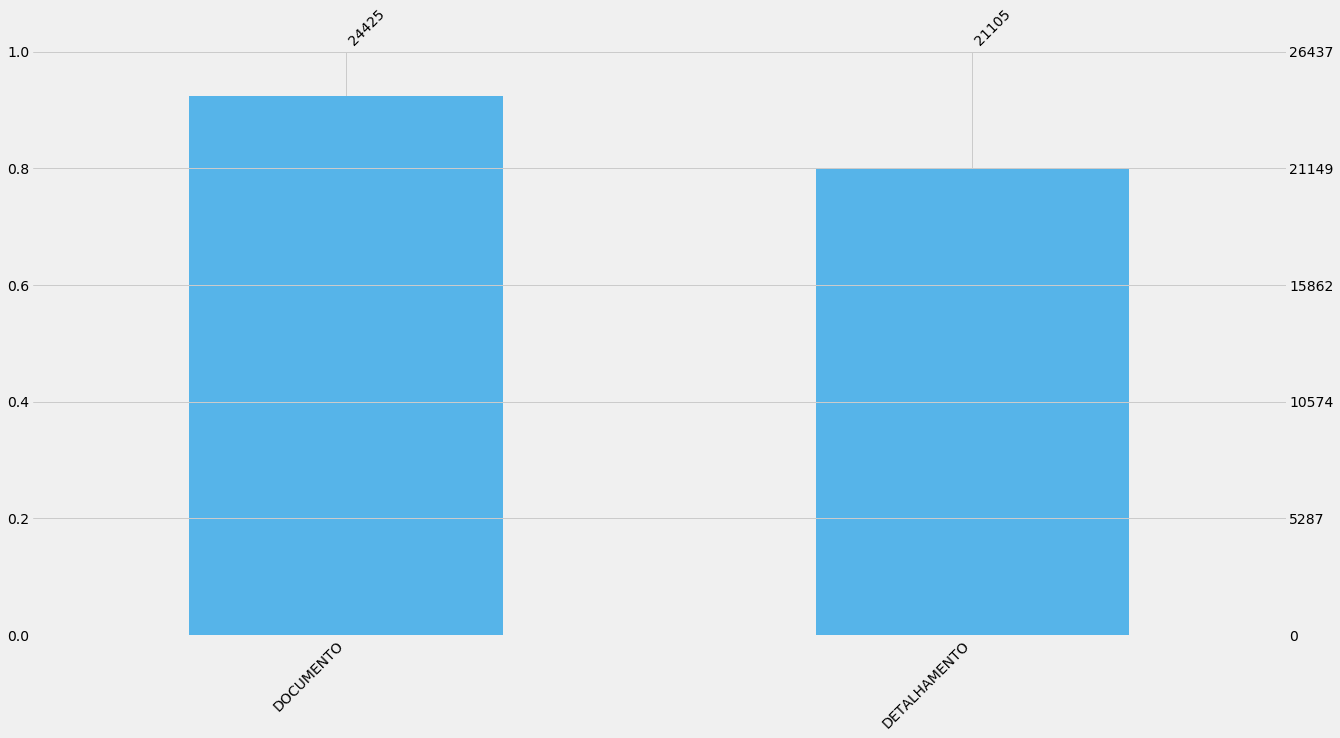

In [75]:
# show missing by columns

msno.bar(df_null,figsize=(20,10),color=default_color,fontsize=14,labels=True)

#### Collumn graphic
Help know distribuition of missing values by collumns

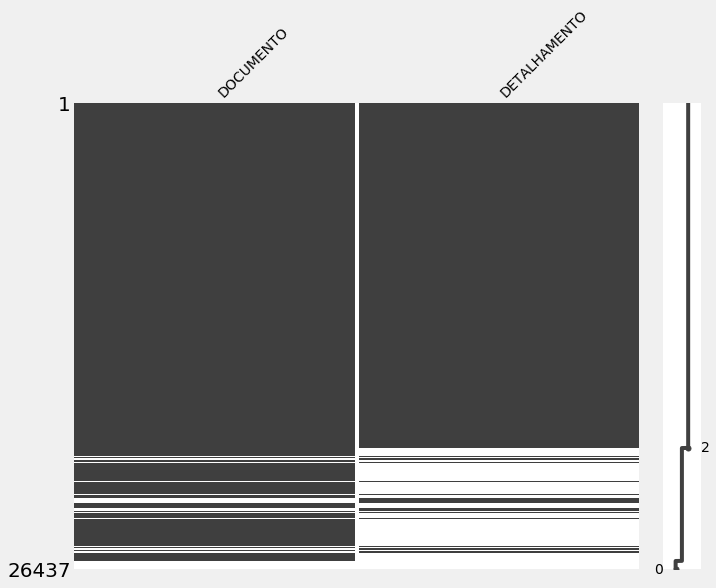

In [76]:
sorted_data = msno.nullity_sort(df_null, sort='descending')
msno.matrix(sorted_data, figsize=(10,8), fontsize=14)

#### Nota:
há poucas variáveis faltando, por isso será utilizado a técnica de preencher com -1 os valores _missing_.

Os dados estão ordenados por SENADORES, então é provável que algum deles não está descrevendo por completo os seus gastos.

In [77]:
# preenche todos os missing values com (-1)
df.fillna(-1, inplace=True)

### Check duplicate values

In [78]:
# Check dataframe
values_duplicated = df.duplicated().sum()
print('Dataframe contains {} lines duplicated.\n'.format(values_duplicated))

Dataframe contains 0 lines duplicated.



### Check unique values

In [79]:
values_unique = df.nunique()
print(values_unique)

ANO                      1
MES                     12
SENADOR                 93
TIPO_DESPESA             7
CNPJ_CPF              3847
FORNECEDOR            4303
DOCUMENTO            22340
DATA                   366
DETALHAMENTO         12152
VALOR_REEMBOLSADO    14014
dtype: int64


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26437 entries, 0 to 26687
Data columns (total 10 columns):
ANO                  26437 non-null int64
MES                  26437 non-null int64
SENADOR              26437 non-null int64
TIPO_DESPESA         26437 non-null object
CNPJ_CPF             26437 non-null object
FORNECEDOR           26437 non-null object
DOCUMENTO            26437 non-null object
DATA                 26437 non-null datetime64[ns]
DETALHAMENTO         26437 non-null object
VALOR_REEMBOLSADO    26437 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 2.2+ MB


Parece fazer sentido estes valores. Então se dará por concluido a parte de _data cleaning and data analisys_.

### Save Data clean


In [86]:
df.to_csv('data/dados_limpos_ceaps_processed.csv', 
          index=False, 
          sep=',', 
          encoding='utf-8')

print('Dados salvos em dados_limpos_ceaps_processed.csv')

Dados salvos em dados_limpos_ceaps_processed.csv
